In [5]:
import pandas as pd 
import numpy as np 
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn import preprocessing

In [6]:
data = pd.read_csv("WineQT.csv")

In [7]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


In [10]:
X = data.loc[:, data.columns!='quality']
y = data["quality"]

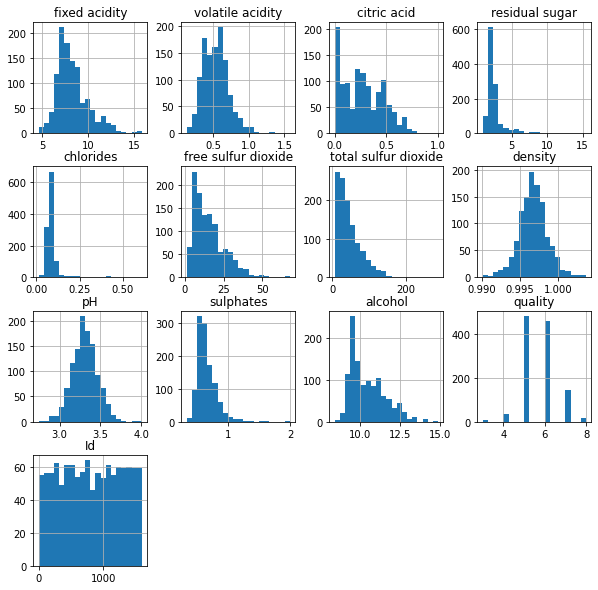

In [11]:
data.hist(bins=20,figsize=(10,10))
plt.show()

In [ ]:
X = X.drop("Id", axis = 1)

In [20]:
def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y, discrete_features=False)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X_train, y_train)

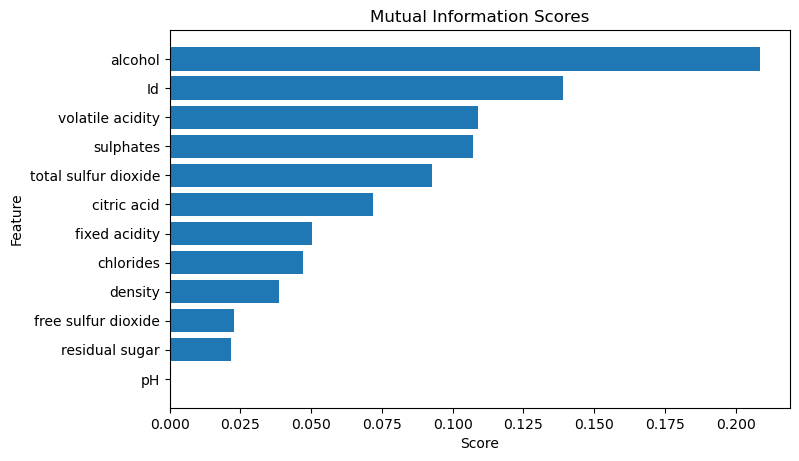

In [21]:
def plot_utility_scores(scores):
    y = scores.sort_values(ascending=True)
    width = np.arange(len(y))
    ticks = list(y.index)
    plt.barh(width, y)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plt.xlabel("Score")
plt.ylabel("Feature")
plot_utility_scores(mi_scores)

In [22]:
for col in data.columns:
    print(col)

fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol
quality
Id


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200)

In [25]:
y_train.shape,y_test.shape

((914,), (229,))

In [26]:
#drop_cols = ["free sulfur dioxide","residual sugar","pH","fixed acidity","density"]
drop_cols = ["free sulfur dioxide","residual sugar","pH","volatile acidity","density","total sulfur dioxide","chlorides"]
X_train = X_train.drop(drop_cols,axis=1)
X_test = X_test.drop(drop_cols,axis=1)

In [27]:
X_train.columns , X_test.columns

(Index(['fixed acidity', 'citric acid', 'sulphates', 'alcohol', 'Id'], dtype='object'),
 Index(['fixed acidity', 'citric acid', 'sulphates', 'alcohol', 'Id'], dtype='object'))

In [28]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train =  min_max_scaler.fit_transform(X_train)

In [29]:
X_test = min_max_scaler.transform(X_test)

In [30]:
print(f'Training data:\n{X_train[0:5]}\nTest data:\n{X_test[0:5]}')

Training data:
[[0.20909091 0.05       0.         0.38461538 0.04007514]
 [0.18181818 0.21       0.20496894 0.12820513 0.94802755]
 [0.24545455 0.23       0.13664596 0.13846154 0.39386349]
 [0.31818182 0.12       0.31055901 0.52307692 0.57545398]
 [0.39090909 1.         1.         0.15384615 0.09455229]]
Test data:
[[0.32727273 0.49       0.46583851 0.13846154 0.32247965]
 [0.30909091 0.3        0.13664596 0.32307692 0.48716343]
 [0.4        0.4        0.22360248 0.27692308 0.30619912]
 [0.2        0.28       0.08695652 0.29230769 0.51596744]
 [0.54545455 0.49       0.10559006 0.50769231 0.34815279]]


In [33]:
y_train = y_train.astype('float32').to_numpy().astype(np.float32)
y_test = y_test.astype('float32').to_numpy().astype(np.float32)

In [34]:
def data_iter(batch_size, features, targets):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = np.array(indices[i:min(i+batch_size,num_examples)])
        yield features[batch_indices],targets[batch_indices]

In [36]:
batch_size = 10
for X, y in data_iter(batch_size, X_train, y_train):
    print(X,'\n',X.shape[0], '\n', y)
    break

[[0.14545455 0.         0.07453416 0.36923077 0.74577332]
 [0.45454545 0.24       0.11180124 0.15384615 0.3356293 ]
 [0.6        0.59       0.16149068 0.4        0.24859111]
 [0.46363636 0.54       0.14906832 0.52307692 0.68252974]
 [0.42727273 0.31       0.32919255 0.24615385 0.21790858]
 [0.15454545 0.02       0.13043478 0.4        0.97495304]
 [0.2        0.01       0.00621118 0.67692308 0.77269881]
 [0.23636364 0.24       0.24223602 0.16923077 0.34189105]
 [0.15454545 0.08       0.20496894 0.63076923 0.66750157]
 [0.7        0.49       0.26708075 0.29230769 0.76643707]] 
 10 
 [5. 5. 6. 8. 6. 6. 6. 6. 7. 6.]


In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
lr = LinearRegression()

In [39]:
lr.fit(X_train,y_train)

LinearRegression()

In [40]:
y_pred = lr.predict(X_test)

In [41]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.2204690012521191